# Assignment - Introduction to Keras and TensorFlow

1. Using the datasets you used in the second project, the regression project and the third project, the classification project, build regression and classification models with Keras.

2. After creating each of the above models, let's consider how we can develop the models you have created. Let's discuss what you can do (or change what you do) to improve your model. Then, let's apply the proposed methods in the Keras library.

## Regression with Keras

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")

df_house_prices = pd.read_csv("house_prices2.csv")
df_house_prices.head()

,SalePrice,BsmtQual,PoolQC,YearBuilt,OverallQual,GrLivArea,GarageCars
0,208500,3,0,2003,7,1710,2
1,181500,3,0,1976,6,1262,2
2,223500,3,0,2001,7,1786,2
3,140000,2,0,1915,7,1717,3
4,250000,3,0,2000,8,2198,3


In [2]:
X = df_house_prices.drop("SalePrice", axis=1)
y = df_house_prices["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

print("X train shape :", X_train.shape)
print("y train shape :", y_train.shape)
print("X test shape  :", X_test.shape)
print("y test shape  :", y_test.shape)

X train shape : (1168, 6)
y train shape : (1168,)
X test shape  : (292, 6)
y test shape  : (292,)


In [3]:
input_number = X_train.shape[1] 

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(input_number,), name = "Hidden_Layer_1"))
model.add(Dense(32, activation='relu', name="Hidden_Layer_2"))
model.add(Dense(1, name="Output"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_Layer_1 (Dense)       (None, 64)                448       
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 32)                2080      
_________________________________________________________________
Output (Dense)               (None, 1)                 33        
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.fit(X_train , y_train, epochs=100, verbose=0)

In [5]:
mae_train = model.evaluate(X_train, y_train, verbose = 0)[1]
mae_test = model.evaluate(X_test, y_test, verbose = 0)[1]

print("\nMAE for train set : {:.3f}".format(mae_train))
print("MAE for test set    : {:.3f}".format(mae_test))


MAE for train set : 37473.219
MAE for test set    : 35748.004


In [6]:
pred_test = model.predict(X_test)
pred_train = model.predict(X_train)

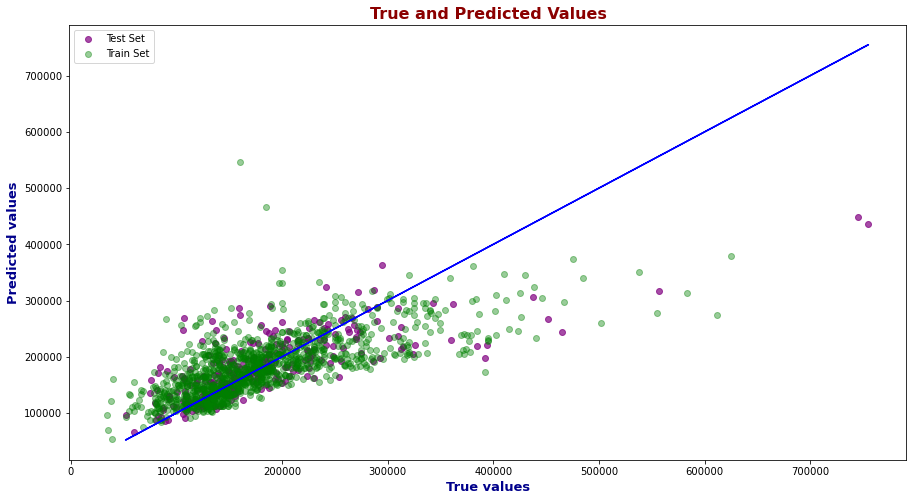

In [7]:
plt.figure(figsize=(15,8))
ax1 = plt.scatter(y_test,pred_test,alpha=0.7,color="purple", )
ax2 = plt.scatter(y_train,pred_train,alpha=0.4,color="green")
ax3 = plt.plot(y_test,y_test,color="blue")
plt.xlabel("True values", color = "darkblue", fontsize=13, fontweight='bold')
plt.ylabel("Predicted values", color = "darkblue", fontsize=13, fontweight='bold' )
plt.title("True and Predicted Values", color = "darkred", 
          fontsize=16, fontweight='bold' )
plt.legend([ax1,ax2], ["Test Set", 'Train Set'])
plt.show()

In [8]:
model_improved = Sequential()
model_improved.add(Dense(100, activation='relu', input_shape=(input_number,), name = "Hidden_Layer_1"))
model_improved.add(Dense(100, activation='relu', name="Hidden_Layer_2"))
model_improved.add(Dense(50, activation='relu', name="Hidden_Layer_3"))
model_improved.add(Dense(1, name="Output"))
model_improved.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_Layer_1 (Dense)       (None, 100)               700       
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 100)               10100     
_________________________________________________________________
Hidden_Layer_3 (Dense)       (None, 50)                5050      
_________________________________________________________________
Output (Dense)               (None, 1)                 51        
Total params: 15,901
Trainable params: 15,901
Non-trainable params: 0
_________________________________________________________________


In [9]:
model_improved.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_improved.fit(X_train , y_train, epochs=500, verbose=0)

In [10]:
mae_train = model_improved.evaluate(X_train, y_train, verbose = 0)[1]
mae_test = model_improved.evaluate(X_test, y_test, verbose = 0)[1]

print("\nMAE for train set : {:.3f}".format(mae_train))
print("MAE for test set    : {:.3f}".format(mae_test))


MAE for train set : 23990.420
MAE for test set    : 25662.285


After adding another hidden layer and increasing the epoch value our model performs better.

In [11]:
pred_test_improved = model_improved.predict(X_test)
pred_train_improved = model_improved.predict(X_train)

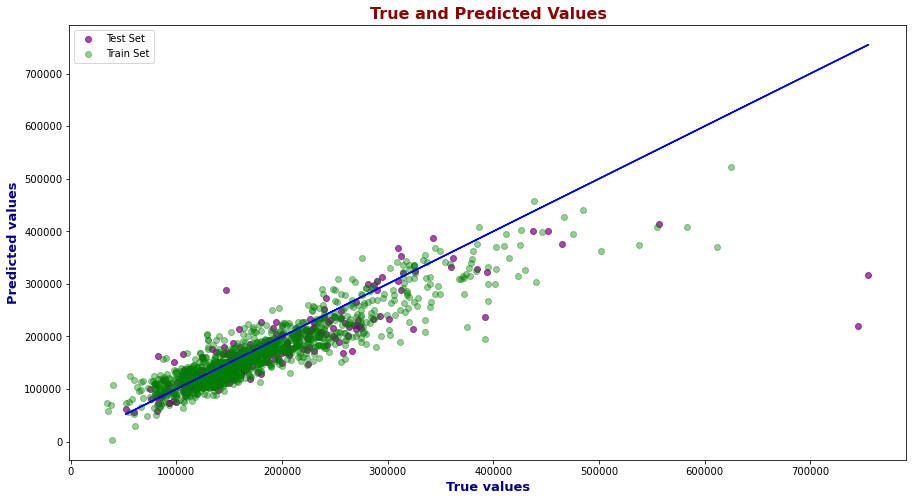

In [12]:
plt.figure(figsize=(15,8))
ax1 = plt.scatter(y_test,pred_test_improved,alpha=0.7,color="purple", )
ax2 = plt.scatter(y_train,pred_train_improved,alpha=0.4,color="green")
ax3 = plt.plot(y_test,y_test,color="blue")
plt.xlabel("True values", color = "darkblue", fontsize=13, fontweight='bold')
plt.ylabel("Predicted values", color = "darkblue", fontsize=13, fontweight='bold' )
plt.title("True and Predicted Values", color = "darkred", 
          fontsize=16, fontweight='bold' )
plt.legend([ax1,ax2], ["Test Set", 'Train Set'])
plt.show()

## Classification with Keras

In [13]:
df_heart_attack = pd.read_csv("risk_of_heart_attack2.csv")
df_heart_attack.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
2,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
3,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
4,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0


In [14]:
X = df_heart_attack.drop('num', axis=1)
y = df_heart_attack['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

print("X train shape :", X_train.shape)
print("y train shape :", y_train.shape)
print("X test shape  :", X_test.shape)
print("y test shape  :", y_test.shape)

X train shape : (141, 13)
y train shape : (141,)
X test shape  : (36, 13)
y test shape  : (36,)


In [15]:
input_number = X_train.shape[1]

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(input_number,), name="Hidden_Layer_1"))
model.add(Dense(8, activation='relu', name='Hidden_Layer_2'))
model.add(Dense(1, activation='sigmoid', name='Output'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_Layer_1 (Dense)       (None, 16)                224       
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 8)                 136       
_________________________________________________________________
Output (Dense)               (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
5/5 [==============================] - 1s 2ms/step - loss: 39.8617 - accuracy: 0.0709
Epoch 2/5
5/5 [==============================] - 0s 2ms/step - loss: 31.4172 - accuracy: 0.0709
Epoch 3/5
5/5 [==============================] - 0s 1ms/step - loss: 22.8381 - accuracy: 0.0709
Epoch 4/5
5/5 [==============================] - 0s 2ms/step - loss: 14.2196 - accuracy: 0.0709
Epoch 5/5
5/5 [==============================] - 0s 2ms/step - loss: 5.0672 - accuracy: 0.1418


In [17]:
accuracy_train = model.evaluate(X_train, y_train, verbose = 0)[1]
accuracy_test = model.evaluate(X_test, y_test, verbose = 0)[1]

print("\nAccuracy for train set : {:.3f}".format(accuracy_train))
print("Accuracy for test set  : {:.3f}".format(accuracy_test))


Accuracy for train set : 0.674
Accuracy for test set  : 0.611


In [18]:
model_improved = Sequential()
model_improved.add(Dense(128, activation='relu', input_shape=(input_number,), name="Hidden_Layer_1"))
model_improved.add(Dense(64, activation='relu', name='Hidden_Layer_2'))
model_improved.add(Dense(1, activation='sigmoid', name='Output'))
model_improved.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_Layer_1 (Dense)       (None, 128)               1792      
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 64)                8256      
_________________________________________________________________
Output (Dense)               (None, 1)                 65        
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_improved.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_improved.fit(X_train, y_train, epochs=10)

Epoch 1/10
5/5 [==============================] - 1s 2ms/step - loss: 1.0002 - accuracy: 0.8865
Epoch 2/10
5/5 [==============================] - 0s 2ms/step - loss: 0.6072 - accuracy: 0.9220
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 0.3832 - accuracy: 0.8936
Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 0.3012 - accuracy: 0.9078
Epoch 5/10
5/5 [==============================] - 0s 2ms/step - loss: 0.2876 - accuracy: 0.9149
Epoch 6/10
5/5 [==============================] - 0s 1ms/step - loss: 0.2646 - accuracy: 0.9220
Epoch 7/10
5/5 [==============================] - 0s 1ms/step - loss: 0.5387 - accuracy: 0.8582
Epoch 8/10
5/5 [==============================] - 0s 2ms/step - loss: 0.3237 - accuracy: 0.9078
Epoch 9/10
5/5 [==============================] - 0s 1ms/step - loss: 0.4102 - accuracy: 0.9007
Epoch 10/10
5/5 [==============================] - 0s 1ms/step - loss: 0.2644 - accuracy: 0.9007


In [20]:
accuracy_train = model_improved.evaluate(X_train, y_train, verbose = 0)[1]
accuracy_test = model_improved.evaluate(X_test, y_test, verbose = 0)[1]

print("\nAccuracy for train set : {:.3f}".format(accuracy_train))
print("Accuracy for test set  : {:.3f}".format(accuracy_test))


Accuracy for train set : 0.929
Accuracy for test set  : 0.944


After increasing the neuron number in our hidden layers and increasing the epoch our model performs better.